In [1]:
import numpy as np
import pandas as pd

C:\Users\jatin\AppData\Local\Temp\ipykernel_2036\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('loan_data.csv')
pd.set_option('display.max_columns', 500)
df = data.copy()

Understanding the data

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Some info about Columns
1. **credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise. (**target**)


2. **purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").


3. **int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.


4. **installment**: The monthly installments owed by the borrower if the loan is funded.


5. **log.annual.inc**: The natural log of the self-reported annual income of the borrower.


6. **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).


7. **fico**: The FICO credit score of the borrower.


8. **days.with.cr.line**: The number of days the borrower has had a credit line.


9. **revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).


10. **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).


11. **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.


12. **delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.


13. **pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## EDA & Data Visualization

In [6]:
df['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

C:\Users\jatin\AppData\Local\Temp\ipykernel_2036\4166554102.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='purpose', order=filtered_df['purpose'].value_counts().index, palette='viridis')


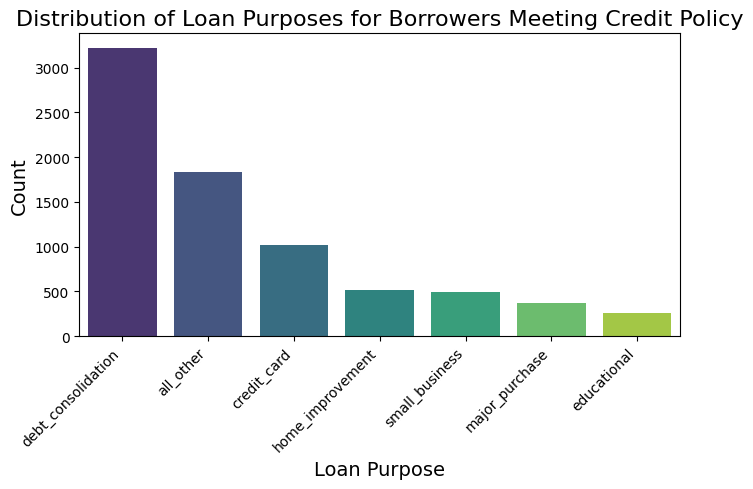

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = df[df['credit.policy'] == 1]

plt.figure(figsize=(7, 5))

sns.countplot(data=filtered_df, x='purpose', order=filtered_df['purpose'].value_counts().index, palette='viridis')

plt.title('Distribution of Loan Purposes for Borrowers Meeting Credit Policy', fontsize=16)
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\jatin\AppData\Local\Temp\ipykernel_2036\2258816709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='purpose', order=filtered_df['purpose'].value_counts().index, palette='viridis')


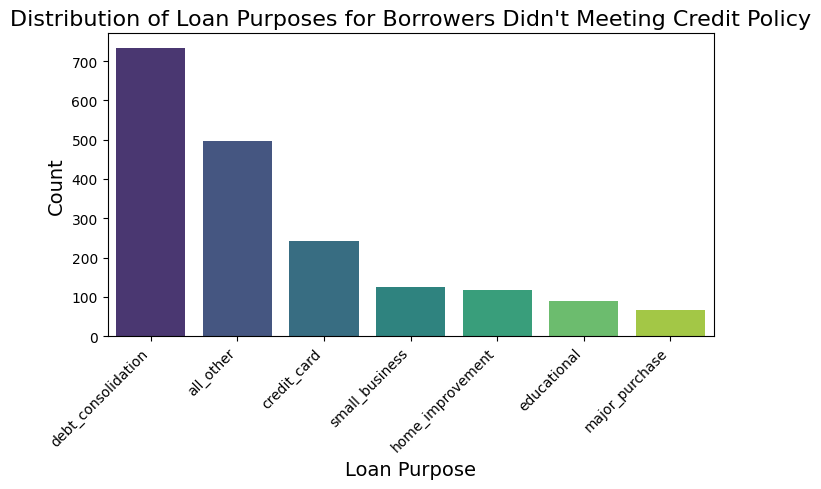

In [8]:
filtered_df = df[df['credit.policy'] == 0]

plt.figure(figsize=(7, 5))

sns.countplot(data=filtered_df, x='purpose', order=filtered_df['purpose'].value_counts().index, palette='viridis')

plt.title("Distribution of Loan Purposes for Borrowers Didn't Meeting Credit Policy", fontsize=16)
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [9]:
df[df['credit.policy'] == 1]['pub.rec'].value_counts()

pub.rec
0    7303
1     394
2       9
3       3
4       1
Name: count, dtype: int64

In [10]:
df['delinq.2yrs'].value_counts()

delinq.2yrs
0     8458
1      832
2      192
3       65
4       19
5        6
6        2
13       1
7        1
8        1
11       1
Name: count, dtype: int64

In [11]:
df.columns[2:]

Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

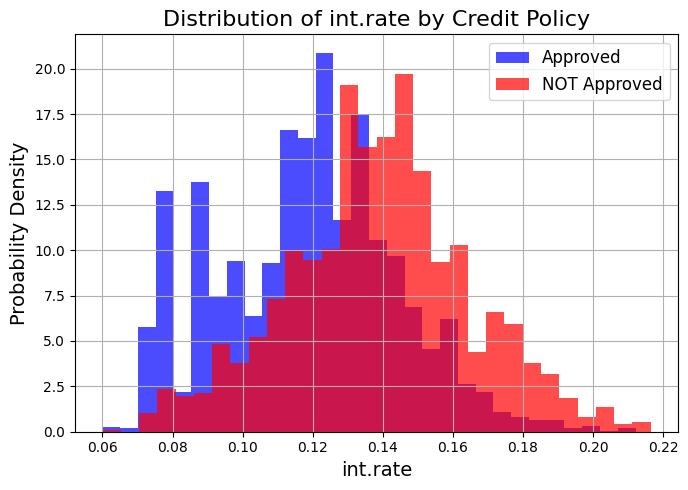

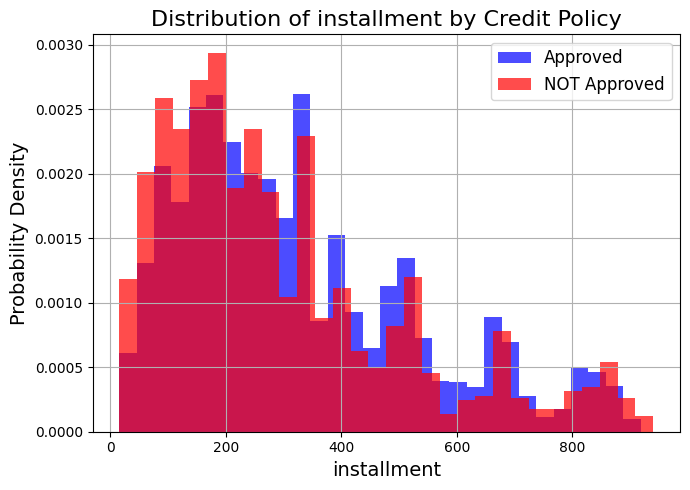

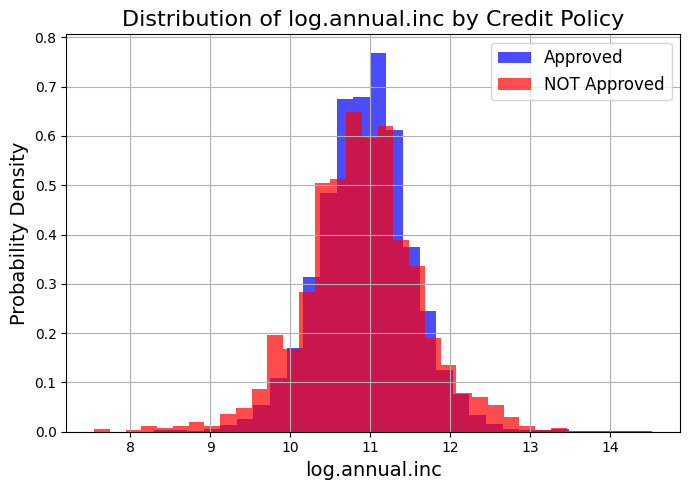

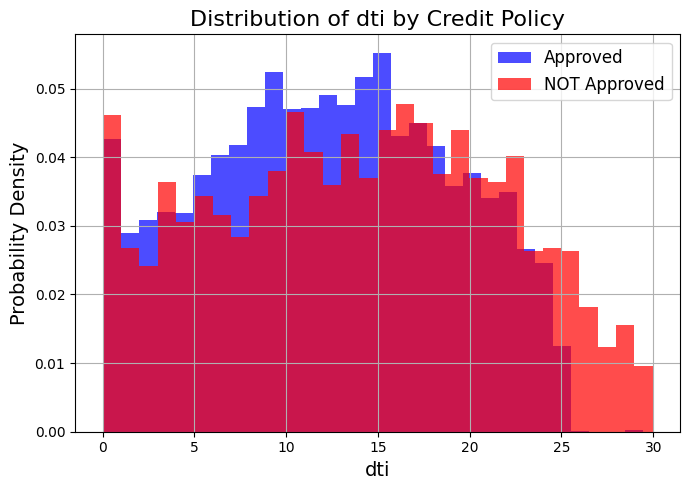

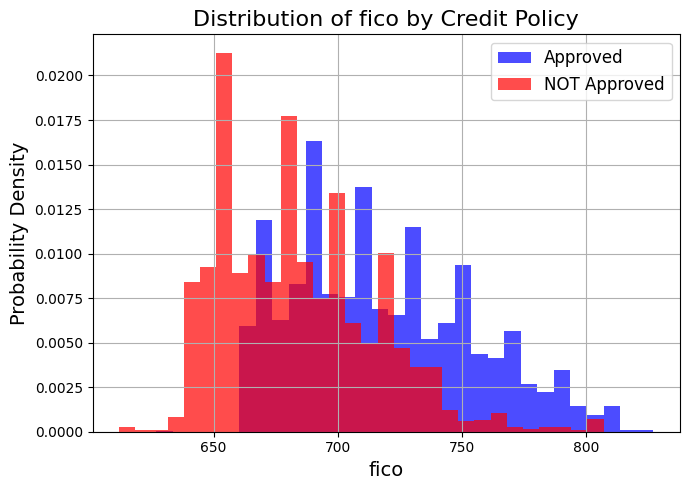

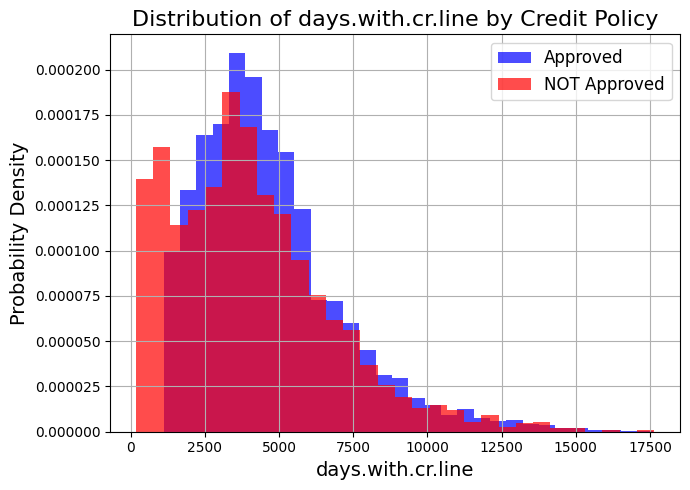

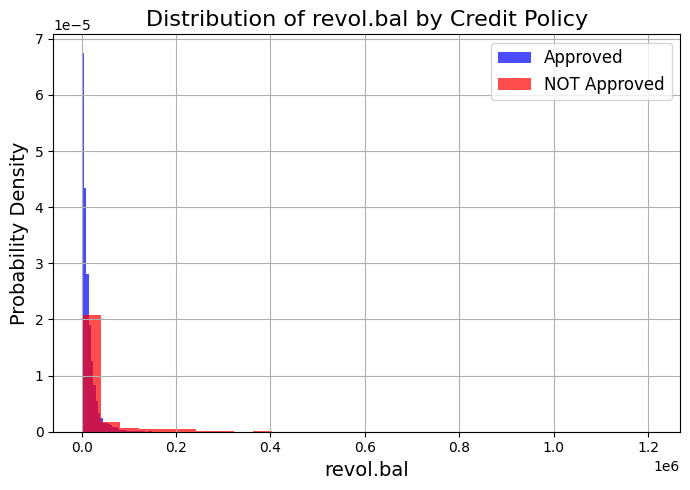

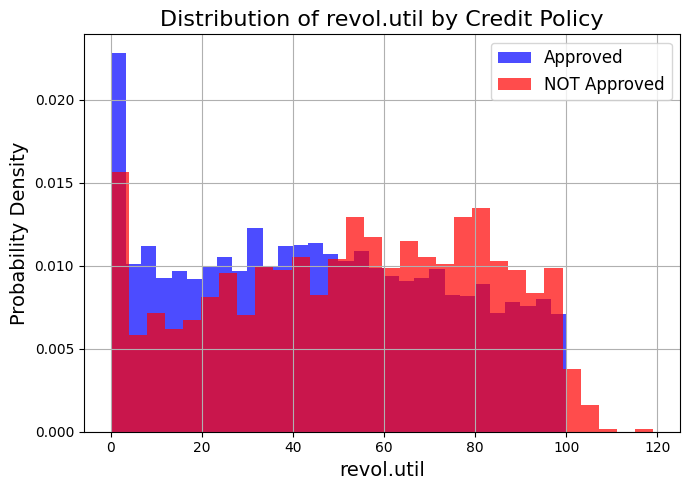

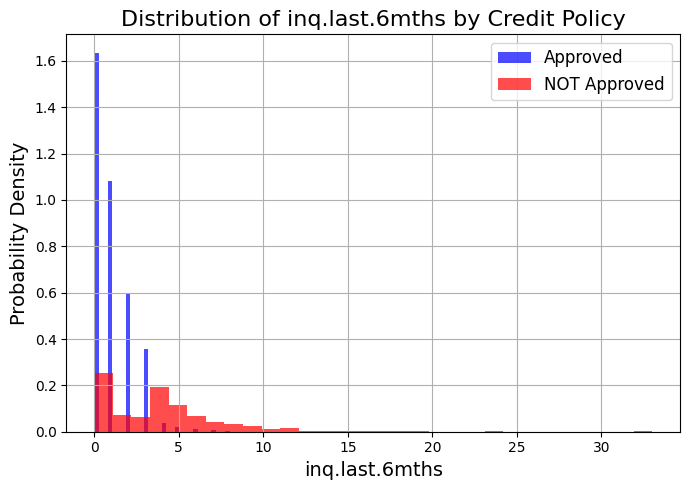

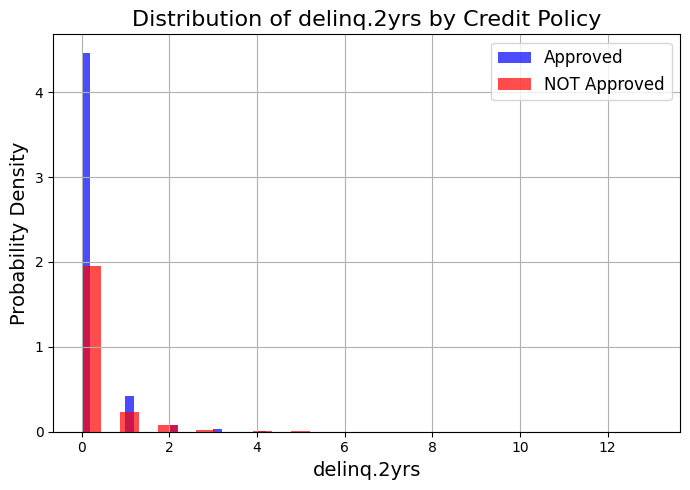

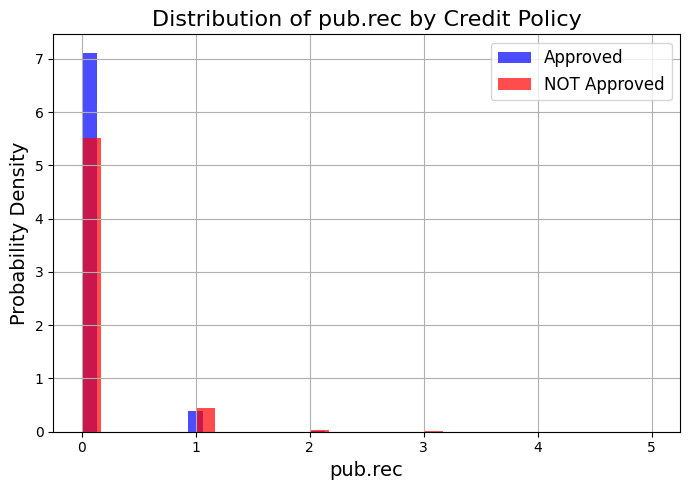

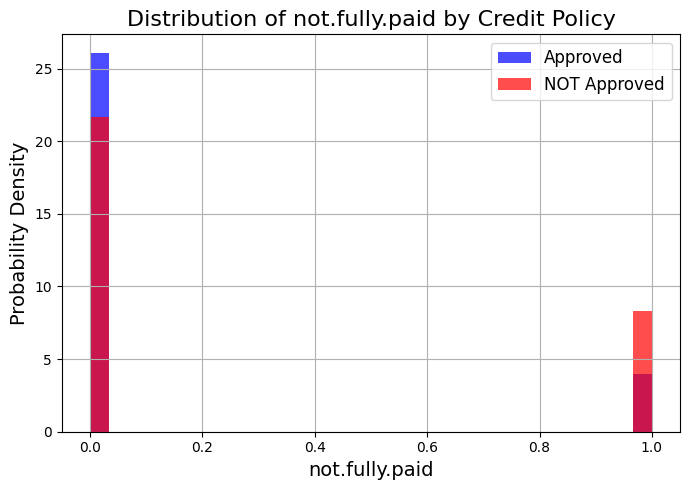

In [12]:
import matplotlib.pyplot as plt

for label in df.columns[2:]:
    plt.figure(figsize=(7, 5))
    plt.hist(df[df["credit.policy"] == 1][label], bins=30, color='blue', alpha=0.7, density=True, label='Approved')
    plt.hist(df[df["credit.policy"] == 0][label], bins=30, color='red', alpha=0.7, density=True, label='NOT Approved')
    plt.title(f'Distribution of {label} by Credit Policy', fontsize=16)
    plt.xlabel(label, fontsize=14)
    plt.ylabel('Probability Density', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [13]:
df['annual.inc'] = np.exp(df['log.annual.inc'])

In [14]:
def income_cat(x):
    if x <= df['annual.inc'].quantile(0.35):
        return 'lower'
    elif x <= df['annual.inc'].quantile(0.50):
        return 'lower-middle'
    elif x <= df['annual.inc'].quantile(0.75):
        return 'middle'
    elif x <= df['annual.inc'].quantile(0.85):
        return 'upper-middle'
    else:
        return 'high'
    
df['income_cat'] = df['annual.inc'].apply(income_cat)

C:\Users\jatin\AppData\Local\Temp\ipykernel_2036\2695624473.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='income_cat', order=filtered_df['income_cat'].value_counts().index, palette='viridis')


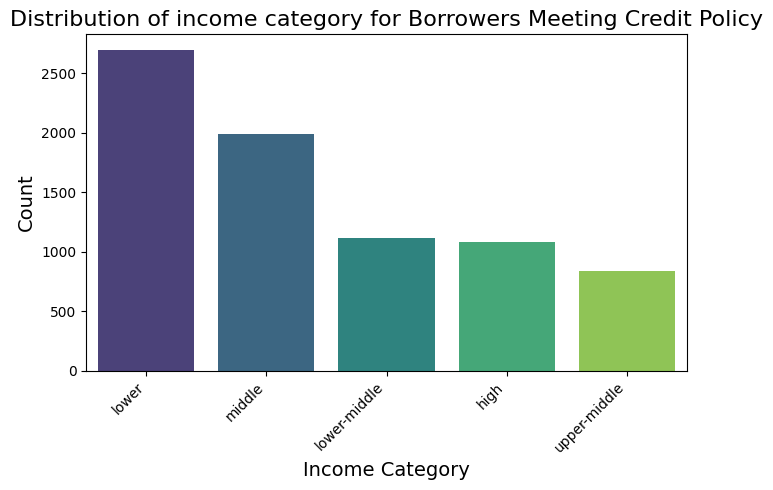

In [15]:
filtered_df = df[df['credit.policy'] == 1]

plt.figure(figsize=(7, 5))

sns.countplot(data=filtered_df, x='income_cat', order=filtered_df['income_cat'].value_counts().index, palette='viridis')

plt.title('Distribution of income category for Borrowers Meeting Credit Policy', fontsize=16)
plt.xlabel('Income Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\jatin\AppData\Local\Temp\ipykernel_2036\3995906074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='income_cat', order=filtered_df['income_cat'].value_counts().index, palette='viridis')


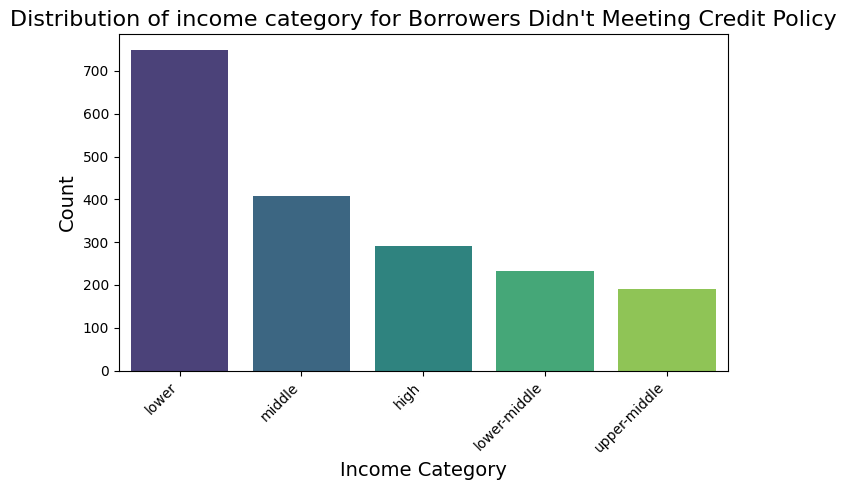

In [16]:
filtered_df = df[df['credit.policy'] == 0]

plt.figure(figsize=(7, 5))

sns.countplot(data=filtered_df, x='income_cat', order=filtered_df['income_cat'].value_counts().index, palette='viridis')

plt.title("Distribution of income category for Borrowers Didn't Meeting Credit Policy", fontsize=16)
plt.xlabel('Income Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
def credit_score_cat(x):
    if x >= 800:
        return 'Excellent'
    elif x >= 740:
        return 'Very good'
    elif x >= 670:
        return 'Good'
    elif x >= 580:
        return 'Fair'
    else:
        return 'Poor'
df['credit_score_cat'] = df['fico'].apply(credit_score_cat)

In [18]:
df['credit_score_cat'].value_counts()

credit_score_cat
Good         6007
Very good    2085
Fair         1341
Excellent     145
Name: count, dtype: int64

In [19]:
# Convert 'credit.policy' column to boolean type
df['credit.policy'] = df['credit.policy'].astype(bool)

# Convert 'not.fully.paid' column to boolean type
df['not.fully.paid'] = df['not.fully.paid'].astype(bool)

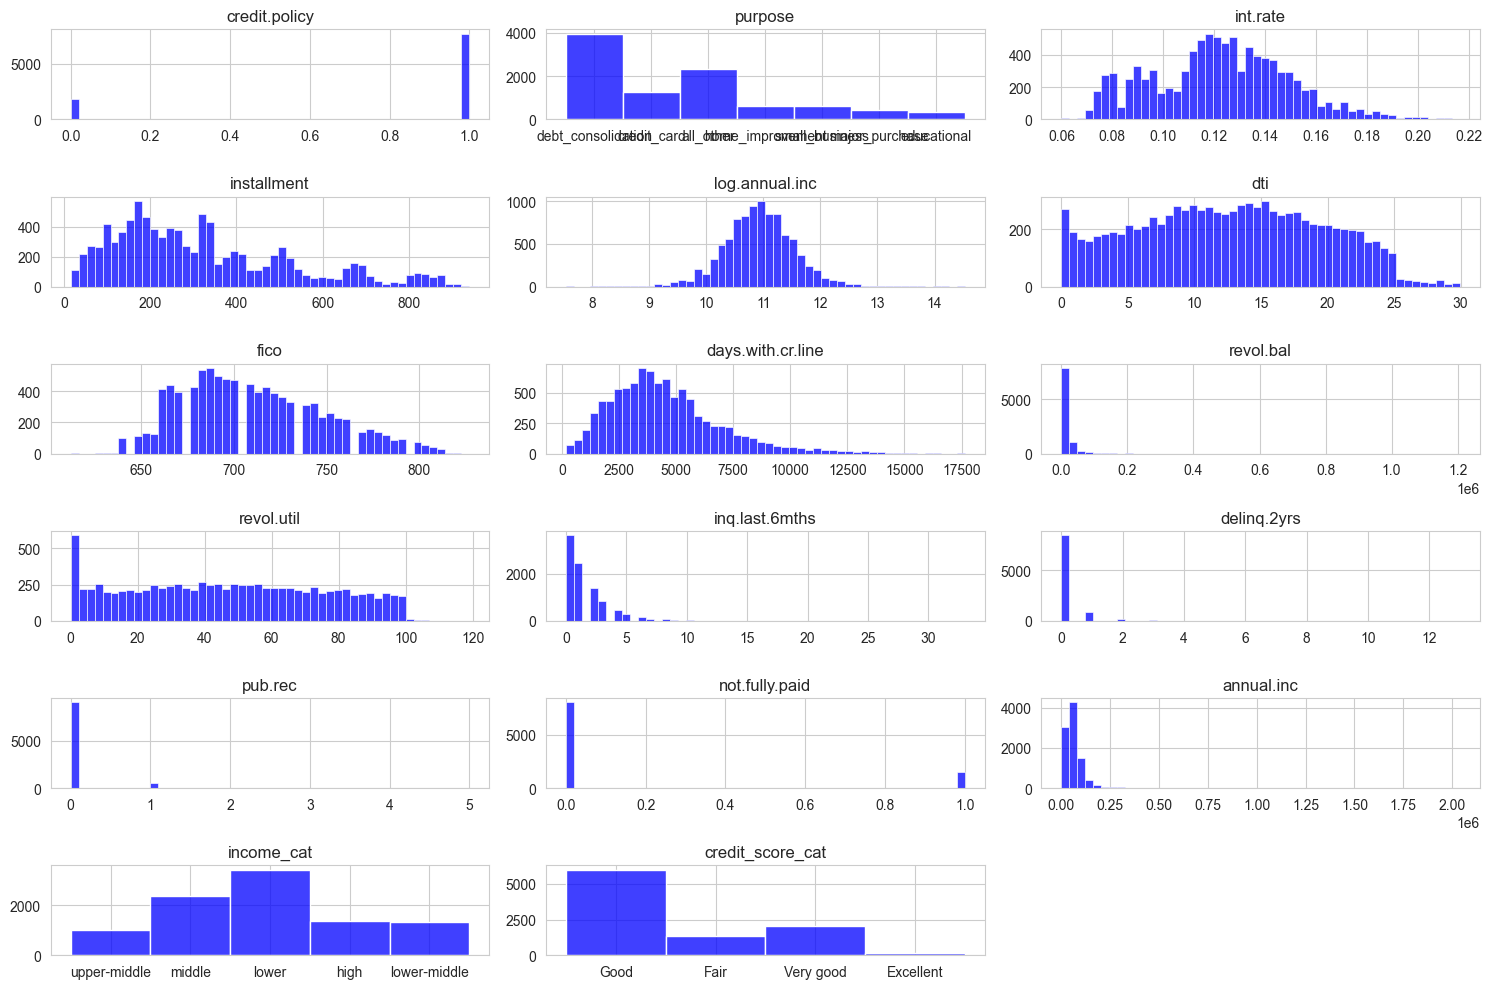

In [20]:
import seaborn as sns
sns.set_style("whitegrid")
n_cols = 3
n_rows = int(np.ceil(len(df.columns) / n_cols))


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()


for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=50, kde=False, ax=axes[i], color='blue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


for j in range(i + 1, len(axes)): # Remove any empty subplots
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

# Checking Correlation

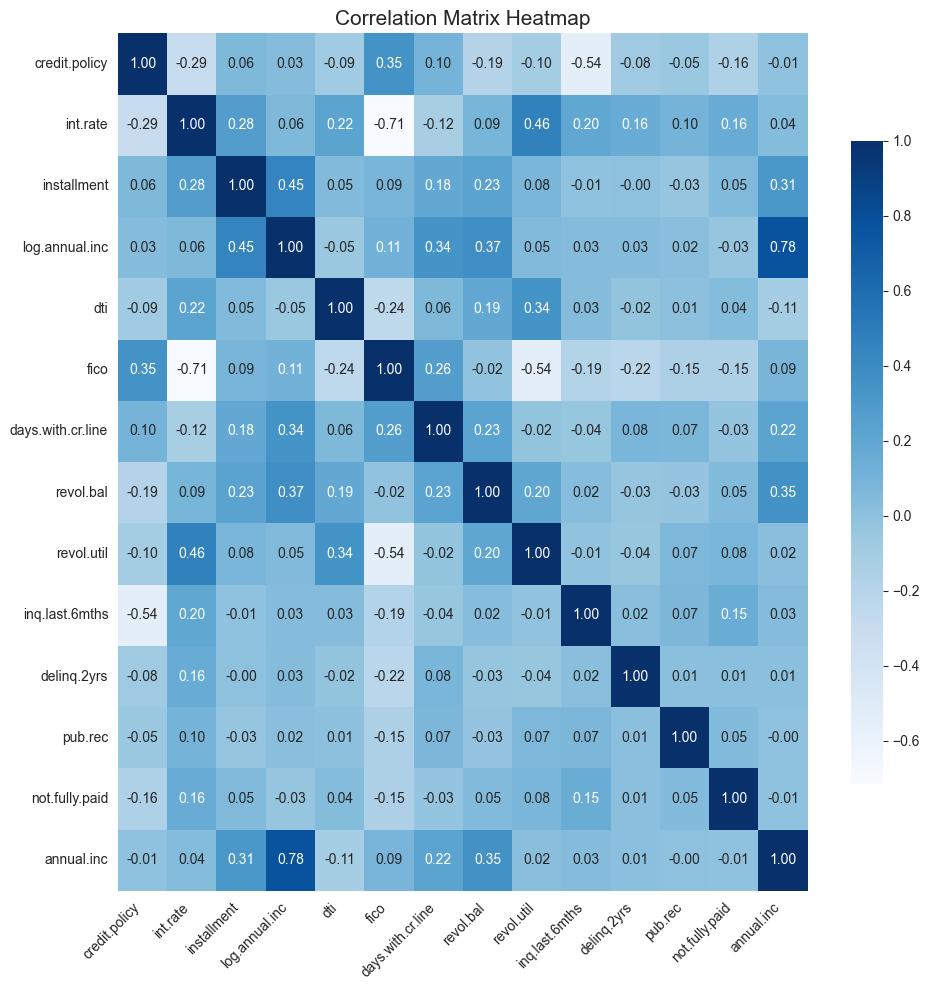

In [21]:
Corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(Corr, cmap="Blues", annot=True, fmt=".2f", annot_kws={"size": 10}, cbar_kws={"shrink": 0.75})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Correlation Matrix Heatmap", fontsize=15)
plt.tight_layout()
plt.show()

array([[<Axes: xlabel='log.annual.inc', ylabel='log.annual.inc'>,
        <Axes: xlabel='revol.bal', ylabel='log.annual.inc'>,
        <Axes: xlabel='installment', ylabel='log.annual.inc'>,
        <Axes: xlabel='days.with.cr.line', ylabel='log.annual.inc'>],
       [<Axes: xlabel='log.annual.inc', ylabel='revol.bal'>,
        <Axes: xlabel='revol.bal', ylabel='revol.bal'>,
        <Axes: xlabel='installment', ylabel='revol.bal'>,
        <Axes: xlabel='days.with.cr.line', ylabel='revol.bal'>],
       [<Axes: xlabel='log.annual.inc', ylabel='installment'>,
        <Axes: xlabel='revol.bal', ylabel='installment'>,
        <Axes: xlabel='installment', ylabel='installment'>,
        <Axes: xlabel='days.with.cr.line', ylabel='installment'>],
       [<Axes: xlabel='log.annual.inc', ylabel='days.with.cr.line'>,
        <Axes: xlabel='revol.bal', ylabel='days.with.cr.line'>,
        <Axes: xlabel='installment', ylabel='days.with.cr.line'>,
        <Axes: xlabel='days.with.cr.line', ylabel='da

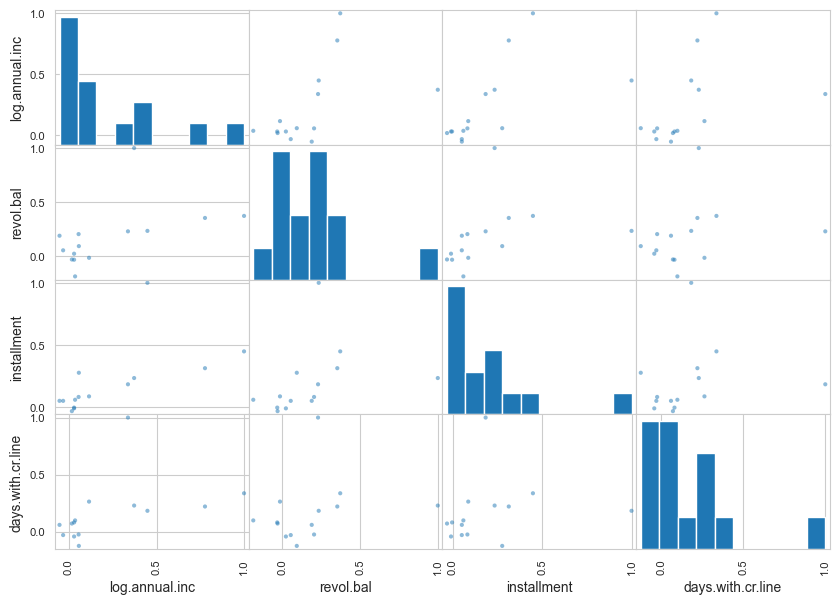

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(Corr[['log.annual.inc', 'revol.bal', 'installment', 'days.with.cr.line']], figsize=(10, 7))

# Preprocessing

preparing train and test sets

In [23]:
from sklearn.model_selection import train_test_split
data['income_cat'] = data['log.annual.inc'].apply(income_cat)
train_set, test_set = train_test_split(data, train_size=0.8, stratify = data['income_cat'])

In [24]:
for x in [train_set, test_set]:
    x.drop('income_cat', axis=1, inplace=True)

Customer Transformers, Feature engineering

In [25]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

# Function to compute annual income
def compute_annual_income(df):
    df['annual.inc'] = np.exp(df['log.annual.inc'])
    return df

# Function to categorize income
def categorize_income(df):
    def income_cat(x):
        if x <= df['annual.inc'].quantile(0.35):
            return 'lower'
        elif x <= df['annual.inc'].quantile(0.50):
            return 'lower-middle'
        elif x <= df['annual.inc'].quantile(0.75):
            return 'middle'
        elif x <= df['annual.inc'].quantile(0.85):
            return 'upper-middle'
        else:
            return 'high'
    
    df['income_cat'] = df['annual.inc'].apply(income_cat)
    return df

# Function to categorize credit scores
def categorize_credit_score(df):
    def credit_score_cat(x):
        if x >= 800:
            return 'Excellent'
        elif x >= 740:
            return 'Very good'
        elif x >= 670:
            return 'Good'
        elif x >= 580:
            return 'Fair'
        else:
            return 'Poor'
    
    df['credit_score_cat'] = df['fico'].apply(credit_score_cat)
    return df

# Function to convert columns to boolean
def convert_to_boolean(df):
    df['not.fully.paid'] = df['not.fully.paid'].astype(bool)
    return df

# Transformer classes
class ComputeAnnualIncome(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return compute_annual_income(X.copy())

class CategorizeIncome(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return categorize_income(X.copy())

class CategorizeCreditScore(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return categorize_credit_score(X.copy())

class ConvertToBoolean(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return convert_to_boolean(X.copy())


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [26]:
from custom_transformers import (ComputeAnnualIncome, CategorizeIncome, 
                                CategorizeCreditScore, ConvertToBoolean) # To avoid PicklingError you can avoid this if you don't wanna save the model.
# Custom transformer to select columns by data type

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names]

# Custom transformer to apply preprocessing steps to selected columns
class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, preprocessors):
        self.preprocessors = preprocessors

    def fit(self, X, y=None):
        for preprocessor in self.preprocessors:
            preprocessor.fit(X)
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for preprocessor in self.preprocessors:
            X_transformed = preprocessor.transform(X_transformed)
        return X_transformed

# Preprocessors for custom transformations
custom_preprocessors = CustomPreprocessor([
    ComputeAnnualIncome(),
    CategorizeIncome(),
    CategorizeCreditScore(),
    ConvertToBoolean()
])


preprocessed2 = ColumnTransformer([
    ('cat', categorical_pipeline, make_column_selector(dtype_include=object)),
    ('num', numerical_pipeline, make_column_selector(dtype_include=np.number))
])



full_pipeline = Pipeline([
    ('preprocess_custom', custom_preprocessors),
    ('preprocess_numerical_categorical', preprocessed2)
])


transformed_data = full_pipeline.fit_transform(train_set)

In [27]:
transformed_data.shape

(7662, 29)

In [28]:
pd.DataFrame(transformed_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-2.026820,1.905707,1.563846,0.767208,1.883195,-0.630733,0.040139,1.306238,1.361992,-0.263082,-0.300449,-0.233013,0.343080
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.493384,-0.889939,0.006686,0.990804,0.264388,0.427122,0.459401,0.033143,0.770300,-0.720683,-0.300449,-0.233013,0.556675
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.493384,0.455418,0.580397,-0.126552,-0.025981,-0.101806,-0.750421,-0.234618,0.988292,-0.720683,-0.300449,-0.233013,-0.269975
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.493384,-1.242206,-0.781086,0.730599,1.375049,0.427122,1.525466,0.088538,-0.513431,-0.720683,-0.300449,-0.233013,0.310817
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.493384,0.624057,-0.691041,-0.771357,-0.657533,-0.895197,-0.343171,-0.313206,0.227050,-0.720683,-0.300449,-0.233013,-0.544143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.493384,1.047526,-1.045430,-0.190319,0.335529,-0.630733,0.423433,-0.401704,1.784135,-0.720683,-0.300449,-0.233013,-0.302173
7658,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.493384,-0.623866,-0.605388,-1.766552,-0.648822,-0.498501,-0.594735,-0.245372,1.358532,-0.720683,-0.300449,-0.233013,-0.802244
7659,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.493384,-0.488955,-0.758358,-1.319483,-0.020173,0.559354,-0.307219,-0.396792,-0.994397,-0.720683,1.488239,-0.233013,-0.705456
7660,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.493384,-0.698816,-0.373230,0.785209,-0.287313,-0.101806,-0.498491,-0.163762,-0.516891,0.194519,1.488239,-0.233013,0.359211


# Training Model

preparing sets for Model

In [29]:
train_X, train_y = train_set.drop('credit.policy', axis=1).copy(), train_set['credit.policy'].copy()

test_X, test_y = test_set.drop('credit.policy', axis=1).copy(), test_set['credit.policy'].copy()

Trying Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = Pipeline([
    ('full_pipeline', full_pipeline),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])

rnd_clf.fit(train_X, train_y)

Pipeline(steps=[('full_pipeline',
                 Pipeline(steps=[('preprocess_custom',
                                  CustomPreprocessor(preprocessors=[ComputeAnnualIncome(),
                                                                    CategorizeIncome(),
                                                                    CategorizeCreditScore(),
                                                                    ConvertToBoolean()])),
                                 ('preprocess_numerical_categorical',
                                  ColumnTransformer(transformers=[('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encoder',
                                                                                    OneHo...'))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000021AFD905070>),
                                                                  ('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000021AFBD418B0>)]))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [31]:
from sklearn.model_selection import cross_val_score

cross_val_score(rnd_clf, train_X, train_y, cv=3)

array([0.98903681, 0.98747063, 0.98512138])

Testing Model

In [32]:
from sklearn.metrics import classification_report
pred = rnd_clf.predict(test_X)
print(classification_report(test_y, pred)) #99 accuracy!

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       368
           1       0.99      1.00      0.99      1548

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.98      1916
weighted avg       0.99      0.99      0.99      1916



Saving the model

In [33]:
import joblib
joblib.dump(rnd_clf, "loan_approval_classifier.pkl") # Ensure custom transformers and necessary modules are defined/imported when loading.

['loan_approval_classifier.pkl']